In [1]:
using LinearAlgebra
using DataFrames
using Statistics
using CSV
using Polynomials
using Plots

# Laboratorium 11

#### Zadanie 1 (1pkt)
Ustal losowe (referencyjne) `x` rozmiaru 1000 oraz losowe `A` rozmiaru 1000x1000, policz `b=A*x`.
Nastepnie rozwiąż równanie `Ax=b` trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego `x`) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania!

In [2]:
dim = 1000
x = rand(dim)
a = rand(dim, dim)
b = a * x 

df = DataFrame(method = String[], time = Float64[], error = Float64[])

,method,time,error
,String,Float64,Float64


In [3]:
function inversion(a, b)
    return inv(a) * b
end

function division(a, b)
    return a \ b
end

function factorization(a, b)
    factorized_a = factorize(a)
    return a \ b
end

factorization (generic function with 1 method)

In [4]:
inversion(a, b)
division(a, b)
factorization(a, b)

1000-element Vector{Float64}:
 0.24067219373826987
 0.4425670441668433
 0.5346636403676058
 0.8025671034040516
 0.9864396849606591
 0.2475181630483665
 0.6202749198103423
 0.5656780895242363
 0.2993967952122814
 0.7844320193511317
 0.008678273045131886
 0.9058566803754382
 0.34003510142018245
 ⋮
 0.21208314187575872
 0.660320788722509
 0.12880221923222201
 0.053954055245087784
 0.12013502646131544
 0.2217413333530456
 0.6096212978821153
 0.8811561848947412
 0.06896277331858058
 0.12920016434312978
 0.17088717533606812
 0.39028062943207886

In [5]:
funcs = [inversion, division, factorization]
methods = ["inv","/", "factorize"]

for i in 1:1:length(funcs)
    for j in 1:1:10
        time = @elapsed funcs[i](a, b)
        error = dot(x - funcs[i](a, b), x - funcs[i](a, b))
        push!(df, [methods[i], time, error])
    end
end

display(df)

,method,time,error
,String,Float64,Float64
1,inv,0.14585,1.01825e-20
2,inv,0.0803478,1.01825e-20
3,inv,0.165,1.01825e-20
4,inv,0.104164,1.01825e-20
5,inv,0.104281,1.01825e-20
6,inv,0.0744418,1.01825e-20
7,inv,0.265569,1.01825e-20
8,inv,0.11066,1.01825e-20
9,inv,0.224,1.01825e-20


In [6]:
grouped = groupby(df, :method)
aggregated = combine(grouped, "time" => mean, "error" => mean)
display(aggregated)

,method,time_mean,error_mean
,String,Float64,Float64
1,inv,0.154569,1.01825e-20
2,/,0.124942,2.91625e-21
3,factorize,0.237106,2.91625e-21


#### Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.

In [7]:
data = CSV.read("c_data.csv", delim=",", DataFrame)
data = data[(data.Operation .== "naive_multiplication"), :]
display(data)

,Size,Operation,Time
,Int64,String31,Float64
1,10,naive_multiplication,0.0
2,10,naive_multiplication,0.0
3,10,naive_multiplication,0.0
4,10,naive_multiplication,0.0
5,10,naive_multiplication,0.0
6,10,naive_multiplication,0.0
7,10,naive_multiplication,0.0
8,10,naive_multiplication,0.0
9,10,naive_multiplication,0.0


In [8]:
grouped = groupby(data, :Size)
aggregated = combine(grouped, "Time" => mean, "Time" => std)

,Size,Time_mean,Time_std
,Int64,Float64,Float64
1,10,0.0,0.0
2,100,0.006,0.00516398
3,190,0.05,0.00666667
4,280,0.167,0.0507828
5,370,0.41,0.100333
6,460,0.932,0.248453


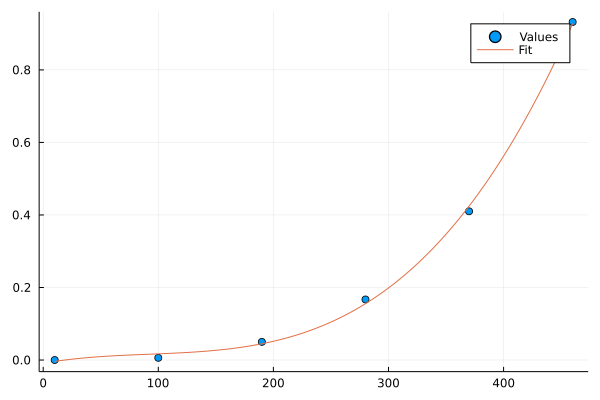

In [9]:
scatter(aggregated.Size, aggregated.Time_mean, label="Values")

fit_f = fit(aggregated.Size, aggregated.Time_mean, 3)
plot!(fit_f, extrema(aggregated.Size)..., label="Fit")

In [10]:
len = length(aggregated.Size)

a = ones(len, 4)
for i in 1:1:4
    a[:, i] = aggregated.Size.^(4 - i)
end
a[:, 4] = ones(len)
display(a)

6×4 Matrix{Float64}:
 1000.0          100.0   10.0  1.0
    1.0e6      10000.0  100.0  1.0
    6.859e6    36100.0  190.0  1.0
    2.1952e7   78400.0  280.0  1.0
    5.0653e7  136900.0  370.0  1.0
    9.7336e7  211600.0  460.0  1.0

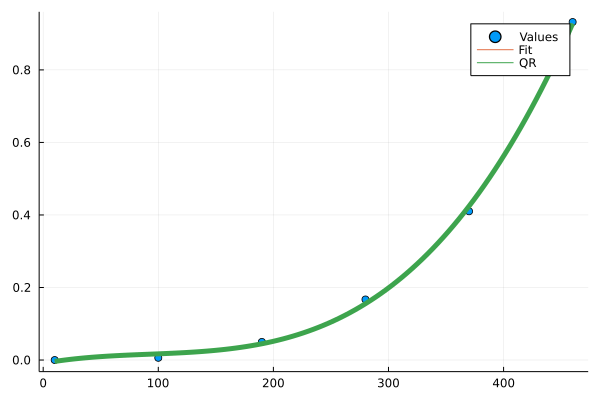

In [11]:
approx_f = factorize(a)
approx_res = approx_f \ aggregated.Time_mean

poly_approx = Polynomial(reverse(approx_res))

plot!(poly_approx, extrema(aggregated.Size)..., 
    label="QR", linewidth=5, lineaplha=0.4)

#### Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

- uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

- zastosowanie faktoryzacji SVD - przykład zastosowania w uczeniu maszynowym https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254

- kompresji danych https://medium.com/balabit-unsupervised/image-compression-using-singular-value-decomposition-de20451c69a3

#### Znajdowanie wartości własnych - faktoryzacja QR

**Algorytm**

Krok 0-wy: $A_0 = A$

Krok k-ty:
- wykonaj faktoryzację QR macierzy $A_k = Q_kR_k$, gdzie:
    - $Q_k$ - macierz ortogonalna, $R_k$ - macierz trójkątna górna
- korzystając z własności mnożenia macierzy oraz ortogonalności $Q_k$: $A_{k+1} = R_k Q_k = Q_k^{-1} Q_k R_k Q_k = Q_k^{-1} A_k Q_k = Q_k^{T} A_k Q_k $

Macierze $A_k$ są podobne, zatem mają te same wartości własne, które w kolejnych iteracjach algorytmu zbiegają do pewnej macierzy trójkątnej, której wartości własne znajdują się na przekątnej głownej macierzy.

In [12]:
function find_eigenvalues(A, steps)
    
    for k in 1:1:steps
        A_k = qr(A)
        A = Transpose(A_k.Q)*A*(A_k.Q)
    end
    ev = [A[i,i] for i in 1:1:size(A, 1)]
end

find_eigenvalues (generic function with 1 method)

In [13]:
A = [6.0 -1.0; 
     2.0 3.0]
ev = find_eigenvalues(A, 100)

2-element Vector{Float64}:
 5.000000000152788
 3.999999999847228

Z kalkulatora wartości własnych: $\lambda_0 = 5, \lambda_1 = 4$

In [14]:
A = [6.0 -1.0 1.0;
     2.0 3.0 2.0;
     2.0 5.0 3.0]
ev = find_eigenvalues(A, 100)

3-element Vector{Float64}:
 7.000000000000012
 5.0000000000000036
 6.018571660417214e-17

Z kalkulatora wartości własnych: $\lambda_0 = 0, \lambda_1 = 5, \lambda_2 = 7$